# **Procesamiento del Lenguaje Natural**

# **Desafío 1**

### Alumno **Daniel Fernando Herrera** (a1621)



# Introducción

In [1]:
%pip install numpy scikit-learn

### Vectorización de texto y modelo de clasificación Naïve Bayes con el dataset 20 newsgroups

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

# 20newsgroups por ser un dataset clásico de NLP ya viene incluido y formateado
# en sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np

## Carga de datos

In [3]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Vectorización

In [4]:
# instanciamos un vectorizador
# ver diferentes parámetros de instanciación en la documentación de sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidfvect = TfidfVectorizer()

In [5]:
# en el atributo `data` accedemos al texto
print(newsgroups_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [6]:
# con la interfaz habitual de sklearn podemos fitear el vectorizador
# (obtener el vocabulario y calcular el vector IDF)
# y transformar directamente los datos
X_train = tfidfvect.fit_transform(newsgroups_train.data)
# `X_train` la podemos denominar como la matriz documento-término

In [7]:
# recordar que las vectorizaciones por conteos son esparsas
# por ello sklearn convenientemente devuelve los vectores de documentos
# como matrices esparsas
print(type(X_train))
print(f'shape: {X_train.shape}')
print(f'Cantidad de documentos: {X_train.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [8]:
# una vez fiteado el vectorizador, podemos acceder a atributos como el vocabulario
# aprendido. Es un diccionario que va de términos a índices.
# El índice es la posición en el vector de documento.
tfidfvect.vocabulary_['car']

25775

In [9]:
# es muy útil tener el diccionario opuesto que va de índices a términos
idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

In [10]:
# en `y_train` guardamos los targets que son enteros
y_train = newsgroups_train.target
y_train[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [11]:
# hay 20 clases correspondientes a los 20 grupos de noticias
print(f'clases {np.unique(newsgroups_test.target)}')
newsgroups_test.target_names

clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Similaridad de documentos

In [12]:
# Veamos similaridad de documentos. Tomemos algún documento
idx = 4811
print(newsgroups_train.data[idx])

THE WHITE HOUSE

                  Office of the Press Secretary
                   (Pittsburgh, Pennslyvania)
______________________________________________________________
For Immediate Release                         April 17, 1993     

             
                  RADIO ADDRESS TO THE NATION 
                        BY THE PRESIDENT
             
                Pittsburgh International Airport
                    Pittsburgh, Pennsylvania
             
             
10:06 A.M. EDT
             
             
             THE PRESIDENT:  Good morning.  My voice is coming to
you this morning through the facilities of the oldest radio
station in America, KDKA in Pittsburgh.  I'm visiting the city to
meet personally with citizens here to discuss my plans for jobs,
health care and the economy.  But I wanted first to do my weekly
broadcast with the American people. 
             
             I'm told this station first broadcast in 1920 when
it reported that year's presidential elec

In [13]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [14]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.70930477, 0.67474953, ..., 0.        , 0.        ,
       0.        ])

In [15]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([4811, 6635, 4253, ..., 9019, 9016, 8748])

In [16]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [17]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'talk.politics.misc'

In [18]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc


### Modelo de clasificación Naïve Bayes

In [19]:
# es muy fácil instanciar un modelo de clasificación Naïve Bayes y entrenarlo con sklearn
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [20]:
# con nuestro vectorizador ya fiteado en train, vectorizamos los textos
# del conjunto de test
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf.predict(X_test)

In [21]:
# el F1-score es una metrica adecuada para reportar desempeño de modelos de claificación
# es robusta al desbalance de clases. El promediado 'macro' es el promedio de los
# F1-score de cada clase. El promedio 'micro' es equivalente a la accuracy que no
# es una buena métrica cuando los datasets son desbalanceados
f1_score(y_test, y_pred, average='macro')

0.5854345727938506

# **Resolución del desafío**

### Desafío. Punto 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**Conclusión**

> Los textos relacionados al principal, en su mayoría coinciden con la clasificación o en su defecto son de una clasificación relacionada.

> Observando en detalle uno de los casos, el documento principal y un documento similar tienen una similitud es 0.667, y se observa que comparte varias palabras e inclusive los documentos del final:
- Could
- post
- Robert Novitskey | "Pursuing women is similar to banging one's head rrn@po.cwru.edu  |  against a wall...with less opportunity for reward"

In [28]:
# 5 documentos al azar del set de entrenamiento
from IPython.display import Markdown, display

np.random.seed(42)
random_docs = np.random.choice(X_train.shape[0], size=5, replace=False)

for idx in random_docs:
  titulo_documento = f"\n ## 📄 Documento base #{idx} (Clase: {newsgroups_train.target_names[y_train[idx]]}):\n"
  display(Markdown(titulo_documento))
  print('\n')
  display(Markdown(f"   **Texto inicial**"))
  print(newsgroups_train.data[idx][:300])  # Mostramos primeros 300 caracteres
  display(Markdown(f"   **Texto final**"))
  print(newsgroups_train.data[idx][-300:])  # Mostramos últimos 300 caracteres
  print('\n')
  display(Markdown('---'))

  # Similaridad coseno contra todos los documentos
  cossim = cosine_similarity(X_train[idx], X_train)[0]
  # como 0 es el documento mismo (similitud = 1), se toma del 1 al 6 para seleccionar otros 5 doc. más similares.
  docs_similares = np.argsort(cossim)[::-1][1:6]

  print("\n🔍 Documentos más similares:")
  for sim_idx in docs_similares:
      clase = newsgroups_train.target_names[y_train[sim_idx]]
      similitud = cossim[sim_idx]
      texto_similar_inicio = newsgroups_train.data[sim_idx][:300].replace("\n", " ") # Mostramos primeros 300 caracteres
      texto_similar_fin = newsgroups_train.data[sim_idx][-300:].replace("\n", " ") # Mostramos últimos 300 caracteres

      display(Markdown(f"\n #### **Documento #{sim_idx}**    Clase: {clase} "))
      display(Markdown(f"   **Similitud: {similitud:.3f}**"))
      display(Markdown(f"   - Texto inicial: {texto_similar_inicio}..."))
      display(Markdown(f"   - Texto final: ... {texto_similar_fin}"))

  display(Markdown('---'))
  display(Markdown('---'))



 ## 📄 Documento base #7492 (Clase: comp.sys.mac.hardware):


   **Texto inicial**

Could someone please post any info on these systems.

Thanks.
BoB
-- 
---------------------------------------------------------------------- 
Robert Novitskey | "Pursuing women is similar to banging one's head
rrn@po.cwru.edu  |  against a wall...with less opportunity for reward" 


   **Texto final**

Could someone please post any info on these systems.

Thanks.
BoB
-- 
---------------------------------------------------------------------- 
Robert Novitskey | "Pursuing women is similar to banging one's head
rrn@po.cwru.edu  |  against a wall...with less opportunity for reward" 




---


🔍 Documentos más similares:



 #### **Documento #10935**    Clase: comp.sys.mac.hardware 

   **Similitud: 0.667**

   - Texto inicial: Hey everybody:     I want to buy a mac and I want to get a good price...who doesn't?  So, could anyone out there who has found a really good deal on a Centris 650 send me the price.  I don't want to know where, unless it is mail order or areound cleveland, Ohio.  Also, should I buy now or wait for t...

   - Texto final: ... w or wait for the Power PC.  Thanks. BoB reply via post or e-mail at rrn@po.cwru.edu --  ----------------------------------------------------------------------  Robert Novitskey | "Pursuing women is similar to banging one's head rrn@po.cwru.edu  |  against a wall...with less opportunity for reward" 


 #### **Documento #7258**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.348**

   - Texto inicial: Hay all:      Has anyone out there heard of any performance stats on the fabled p24t.  I was wondering what it's performance compared to the 486/66 and/or pentium would be.  Any info would be helpful.  Later BoB --  Robert Novitskey | rrn@po.cwru.edu | (216)754-2134 | CWRU Cleve. Ohio --------------...

   - Texto final: ... rmance compared to the 486/66 and/or pentium would be.  Any info would be helpful.  Later BoB --  Robert Novitskey | rrn@po.cwru.edu | (216)754-2134 | CWRU Cleve. Ohio ---------------------------------------------------------------------- COMPUTER ENGINEER AND C PROGRAMMER |  NOW SEEKING SUMMER JOBS


 #### **Documento #4971**    Clase: comp.sys.mac.hardware 

   **Similitud: 0.180**

   - Texto inicial: Could someone please send instructions for installing simms and vram to  jmk13@po.cwru.edu?  He's just gotten his 700 and wants to drop in some  extra simms and vram that he has for it....

   - Texto final: ... Could someone please send instructions for installing simms and vram to  jmk13@po.cwru.edu?  He's just gotten his 700 and wants to drop in some  extra simms and vram that he has for it.


 #### **Documento #4303**    Clase: misc.forsale 

   **Similitud: 0.155**

   - Texto inicial: For sale:  Roland D-50: $700 or best offer. Excellent condition. Includes over 1000 patches on disk (In cakewalk sysex format)  Buyer must pay COD shipping.  Please e-mail responses to: gms2@po.cwru.edu  Thanks.  George ...

   - Texto final: ... For sale:  Roland D-50: $700 or best offer. Excellent condition. Includes over 1000 patches on disk (In cakewalk sysex format)  Buyer must pay COD shipping.  Please e-mail responses to: gms2@po.cwru.edu  Thanks.  George 


 #### **Documento #645**    Clase: comp.sys.mac.hardware 

   **Similitud: 0.141**

   - Texto inicial: I'd appreciate it greatly if someone could E-mail me the following: (if you only know one, that's fine) 1) Specs for the 68040 (esp. how it compares to the Pentium) 2) Specs for the 68060 with estimated cost, release date, etc...  I'm interested in speeds, systems it can run (Windows NT, RISC, or wh...

   - Texto final: ... timated cost, release date, etc...  I'm interested in speeds, systems it can run (Windows NT, RISC, or whatever), costs, bus info, register info.  All the technical info.  I am hoping that the 68040 can win yet another battle against the intel people.   :)  Thanks for any info you can give.  Thanks.

---

---


 ## 📄 Documento base #3546 (Clase: comp.os.ms-windows.misc):


   **Texto inicial**



     Don't bother if you have CPBackup or Fastback.  They all offer options 
not available in the stripped-down MS version (FROM CPS!).  Examples - no 
proprietary format (to save space), probably no direct DMA access, and no 
tape drive!


   **Texto final**



     Don't bother if you have CPBackup or Fastback.  They all offer options 
not available in the stripped-down MS version (FROM CPS!).  Examples - no 
proprietary format (to save space), probably no direct DMA access, and no 
tape drive!




---


🔍 Documentos más similares:



 #### **Documento #5665**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.204**

   - Texto inicial:  By initiating a DMA xfer.  :)  Seriously, busmastering adapter have their own DMA ability, they don't use the motherboards on-board DMA(which is *MUCH* slower).  ISA has no bus arbitration, so if two busmastering cards in 1 ISA system try to do DMA xfers on the same DMA channel the system will lock...

   - Texto final: ... ses and then simply configure the SCSI HA to use a different DMA channel for its DMA xfers.  I don't know if multiple DMA xfers can go on at the same time on ISA. I'm not sure if they can on EISA systems either.  I do know that on EISA/MCA systems, you can allow BM cards to use the same DMA channel.


 #### **Documento #2011**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.192**

   - Texto inicial:   IDE also uses DMA techniques.  I believe floppy controller also uses DMA, and most A/D boards also use DMA.  DMA is no big deal, and has nothing to do directly with SCSI.   You can thank your software for that.  If DOS had a few more brains, it could format floppies etc. while you were doing somet...

   - Texto final: ... can thank your software for that.  If DOS had a few more brains, it could format floppies etc. while you were doing something else.  The hardware will support it, but DOS (at least) won't.  Again, this has    nothing to do with SCSI.   And if you stick with DOS you'll wonder why you can't multitask.


 #### **Documento #8643**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.172**

   - Texto inicial:  There would be no problems as long as the OS didn't set up a DMA transfer to an area above the 16 mb area (the DMA controller probably can't be programmed that way anyways, so there probably isin't a problem with this)...

   - Texto final: ...  There would be no problems as long as the OS didn't set up a DMA transfer to an area above the 16 mb area (the DMA controller probably can't be programmed that way anyways, so there probably isin't a problem with this)


 #### **Documento #1546**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.171**

   - Texto inicial:        Here's a document that I wrote some time back.  It's slightly out-of-date, now that DOS 6 has been released, but much of it is still useful.       -- Darryl Okahata 	Internet: darrylo@sr.hp.com  DISCLAIMER: this message is the author's personal opinion and does not constitute the support, opi...

   - Texto final: ... com /p    However, if I used a floppy-controller-based tape drive, or if I   planned to record high-quality sound from a sound card, I would still   need some way of changing the Adaptec's bus on/off times.  The first   two versions of CONFIG.SYS take care of this, but this last version   doesn't.  


 #### **Documento #8765**    Clase: comp.sys.ibm.pc.hardware 

   **Similitud: 0.162**

   - Texto inicial: The floppy is served by DMA on the motherboard, and original DMA-controller can't reach more than the first 16MB (The address-space of the ISA-bus) joerg ...

   - Texto final: ... The floppy is served by DMA on the motherboard, and original DMA-controller can't reach more than the first 16MB (The address-space of the ISA-bus) joerg 

---

---


 ## 📄 Documento base #5582 (Clase: misc.forsale):


   **Texto inicial**

5.25" Internal Low density disk drive.

Monochrome monitor

8088 motherboard, built in parallel and serial ports, built in mono and
color output, 7Mhz.

Libertarian, atheist, semi-anarchal Techno-Rat.


   **Texto final**

5.25" Internal Low density disk drive.

Monochrome monitor

8088 motherboard, built in parallel and serial ports, built in mono and
color output, 7Mhz.

Libertarian, atheist, semi-anarchal Techno-Rat.




---


🔍 Documentos más similares:



 #### **Documento #5510**    Clase: misc.forsale 

   **Similitud: 0.462**

   - Texto inicial: I am looking for a 286 motherboard, preferable 12 or 16, 640k or 1 meg RAM.  I am also looking for a VGA card.  Am willing to trade 1200 external, 5.25" LD Drive, 8088 motherboard, monochrome monitor, Game Boy, in some combination for the above.  Libertarian, atheist, semi-anarchal Techno-Rat....

   - Texto final: ... I am looking for a 286 motherboard, preferable 12 or 16, 640k or 1 meg RAM.  I am also looking for a VGA card.  Am willing to trade 1200 external, 5.25" LD Drive, 8088 motherboard, monochrome monitor, Game Boy, in some combination for the above.  Libertarian, atheist, semi-anarchal Techno-Rat.


 #### **Documento #4922**    Clase: misc.forsale 

   **Similitud: 0.300**

   - Texto inicial: For sale:  Nintendo Game Boy, Tetris, Castlevania Adventure, All-Star Challenge, Nemesis, Play-Action football, link cable.  Make me an offer.  Libertarian, atheist, semi-anarchal Techno-Rat....

   - Texto final: ... For sale:  Nintendo Game Boy, Tetris, Castlevania Adventure, All-Star Challenge, Nemesis, Play-Action football, link cable.  Make me an offer.  Libertarian, atheist, semi-anarchal Techno-Rat.


 #### **Documento #4347**    Clase: comp.graphics 

   **Similitud: 0.274**

   - Texto inicial:   It's really not that hard to do.  There are books out there which explain everything, and the basic 3D functions, translation, rotation, shading, and hidden line removal are pretty easy.  I wrote a program in a few weeks witht he help of a book, and would be happy to give you my source. 	Also, Qui...

   - Texto final: ... nd Think pascal can access them, and I would expect that THINK C could as well.  If you can find out how to use the Quickdraw graphics library, it would be an excellent choice, since it has a lot of stuff, and is built into the Mac, so should be fast.  Libertarian, atheist, semi-anarchal Techno-Rat.


 #### **Documento #8057**    Clase: misc.forsale 

   **Similitud: 0.208**

   - Texto inicial: Hello, I have a motherboard and a case for sale as a package. Both of them came from a CompuAdd computer I bought last August and am    presently upgrading. Here are the specs--  Motherboard ----------- Cyrix 486SL 25 MHz microprocessor Chips and Technology chipset (SCATsx V2.3.6 SLSLC) 8 SIMM banks...

   - Texto final: ... en the facts that it includes a video card and drive controllers/IO   ports.  All you need to do is add drives, a monitor, RAM, and a keyboard.    Also keep in mind that it isn't a generic board, but from CompuAdd. I also will entertain all serious offers.  Please email at jmu@acpub.duke.edu  Thanks


 #### **Documento #4028**    Clase: comp.graphics 

   **Similitud: 0.169**

   - Texto inicial: Hello, and thank you for reading this request.  I have a Mpeg viewer for x-windows and it did not run because I was running it on a monochrome monitor.  I need the mono-driver for mpeg_play.   ...

   - Texto final: ... Hello, and thank you for reading this request.  I have a Mpeg viewer for x-windows and it did not run because I was running it on a monochrome monitor.  I need the mono-driver for mpeg_play.   

---

---


 ## 📄 Documento base #4793 (Clase: talk.politics.guns):


   **Texto inicial**

Hi,

In Canada, any gun that enters a National Park must be sealed (I think it's a
small metal tag that's placed over the trigger).  The net result of this is
that you _can't_ use a gun to protect yourself from bears (or psychos) in the
National Parks.  Instead, one has to be sensitive to the danger


   **Texto final**

, one has to be sensitive to the dangers and annoyances
of hiking in bear country, and take the appropriate precautions.

I think this policy makes the users of the National Parks feel a little closer
to Nature, that they are a part of Nature and, as such, have to deal with
nature on it's own terms.




---


🔍 Documentos más similares:



 #### **Documento #6894**    Clase: talk.politics.guns 

   **Similitud: 0.236**

   - Texto inicial: Here is a press release from the White House.   President Clinton's Remarks On Waco With Q/A  To: National Desk  Contact: White House Office of the Press Secretary, 202-456-2100     WASHINGTON, April 20 -- Following are remarks by President  Clinton in a question and answer session with the press:  ...

   - Texto final: ... ts launch this investigation and bring in some outside experts.  And as I said in my statement, if any congressional committees want to look into it, we will fully cooperate.  There is nothing to hide here.  This was probably the most well-covered operation of its kind in the history of the country.


 #### **Documento #5856**    Clase: sci.crypt 

   **Similitud: 0.236**

   - Texto inicial:  Thanks for posting this and making it available. This post will be LONG, I will comment on most of it, and am reluctantly leaving all of the original in place to provide context.  Please note that an alt. group has been set up for the Clipper stuff.                                                  ...

   - Texto final: ... al giggle. In Australia or France, they will have to reveal the keys, and the algorithm. Don't think it's at the top of my list of things I must have, so the restrictions will protect me from saleks trying to sell me a bill of crock.  Any for any others using it, they must be nuts!  Good luck folks.


 #### **Documento #4271**    Clase: talk.politics.misc 

   **Similitud: 0.233**

   - Texto inicial: THE WHITE HOUSE                      Office of the Press Secretary ______________________________________________________________ For Immediate Release                             April 13, 1993       	                            REMARKS BY THE PRESIDENT,                SECRETARY OF EDUCATION RICHAR...

   - Texto final: ... :  Thank you, very much.  I think that's  going to be the last call that we have time for.  Mr. President, I  think you've got to move on to another matter, and I want to thank  you and Secretary Reich for being here.  We appreciate your time and  your ideas, and it's been a tremendous help to us.  


 #### **Documento #3141**    Clase: talk.politics.guns 

   **Similitud: 0.230**

   - Texto inicial:         Mr. Parsli, I have to take exception at this.  There are verifiable, previous *examples* of levels of U.S. governments abusing gun-control restrictions.  I don't think it is paranoid to worry that what has been abused in the recent past might be abused in thye future.  After so many times of...

   - Texto final: ... ouseholds have some form of firearm, usually a long gun. That accounts for a level of access for at least 100 million Americans. Firearm ownership is most likely among educated, well-off whites, the group *least* likely to be involved in violent crime.         You may take that for what it's worth. 


 #### **Documento #10836**    Clase: alt.atheism 

   **Similitud: 0.229**

   - Texto inicial: Archive-name: atheism/faq Alt-atheism-archive-name: faq Last-modified: 5 April 1993 Version: 1.1                      Alt.Atheism Frequently-Asked Questions  This file contains responses to articles which occur repeatedly in alt.atheism.  Points covered here are ones which are not covered in the "In...

   - Texto final: ... l at Algiers, a close friend of Thomas Paine -- and an opponent of Christianity.  It is possible that Barlow made up Article XI, but since there is no Arabic version of that article to be found, it's hard to say.  In 1806 a new Treaty of Tripoli was ratified which no longer contained the quotation. 

---

---


 ## 📄 Documento base #3813 (Clase: rec.sport.hockey):


   **Texto inicial**


Doesn't it also have the Statue of Liberty on it or is that Richter's Mask?

The back actually has a Bee followed by a Z to represent the Beezer. It 
also has something that looks like the three interconnecting circles from
the Led Zepplin 4 album cover. Is that what it is supposed to be? and if
it


   **Texto final**

llowed by a Z to represent the Beezer. It 
also has something that looks like the three interconnecting circles from
the Led Zepplin 4 album cover. Is that what it is supposed to be? and if
it is does anybody know why he would put it there? Ali?


John
"The official Language of Golf is Profanity"







---


🔍 Documentos más similares:



 #### **Documento #10836**    Clase: alt.atheism 

   **Similitud: 0.251**

   - Texto inicial: Archive-name: atheism/faq Alt-atheism-archive-name: faq Last-modified: 5 April 1993 Version: 1.1                      Alt.Atheism Frequently-Asked Questions  This file contains responses to articles which occur repeatedly in alt.atheism.  Points covered here are ones which are not covered in the "In...

   - Texto final: ... l at Algiers, a close friend of Thomas Paine -- and an opponent of Christianity.  It is possible that Barlow made up Article XI, but since there is no Arabic version of that article to be found, it's hard to say.  In 1806 a new Treaty of Tripoli was ratified which no longer contained the quotation. 


 #### **Documento #759**    Clase: soc.religion.christian 

   **Similitud: 0.248**

   - Texto inicial:  Oh contrer mon captitan!  There is a way.  Certainly it is not by human reason.  Certainly it is not by human experience. (and yet it is both!)  To paraphrase Sartre, the particular is absurd unless it has an infinite reference point.  It is only because of God's own revelation that we can be absol...

   - Texto final: ...  it is real, it can be experienced and it is verifiable.  I disagree with Dr Nancy's Sweetie's conclusion because if it is taken to fruition it leads to relativism which leads to dispair.    "I would know the words which He would answer me, and understand what He would say unto me."  Job 23ff  --Rex


 #### **Documento #913**    Clase: alt.atheism 

   **Similitud: 0.241**

   - Texto inicial: The recent rise of nostalgia in this group, combined with the   incredible level of utter bullshit, has prompted me to comb   through my archives and pull out some of "The Best of Alt.Atheism"   for your reading pleasure.  I'll post a couple of these a day   unless group concensus demands that I sto...

   - Texto final: ...  largely accepted.  Things may well continue that way for some time.  Pausing a moment to consider the way the doctrines of Christianity have been accepted and used (properly or improperly) to support wars and persecution, I suppose there is one prophecy of which Christianity can securely keep hold.


 #### **Documento #5826**    Clase: soc.religion.christian 

   **Similitud: 0.241**

   - Texto inicial: A listmember (D Andrew Killie, I think) wrote, in response to the suggestion that genocide may sometimes be the will of God:   > Any God who works that way is indescribably evil,  > and unworthy of my worship or faith.  Nobuya "Higgy" Higashiyama replied (as, in substance, did others):   > Where is ...

   - Texto final: ... to just condemnation and punishment.      Second point. Of course, God will bring good out of it. But not the same good that He would have brought if the Serbians had refrained from the sins of robbery and rape and murder. Nor does the good He purposes excuse us from the duty of doing what is right.


 #### **Documento #5856**    Clase: sci.crypt 

   **Similitud: 0.233**

   - Texto inicial:  Thanks for posting this and making it available. This post will be LONG, I will comment on most of it, and am reluctantly leaving all of the original in place to provide context.  Please note that an alt. group has been set up for the Clipper stuff.                                                  ...

   - Texto final: ... al giggle. In Australia or France, they will have to reveal the keys, and the algorithm. Don't think it's at the top of my list of things I must have, so the restrictions will protect me from saleks trying to sell me a bill of crock.  Any for any others using it, they must be nuts!  Good luck folks.

---

---

### Desafío. Punto 2

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**Parametrización**

Se probaron distintas combinaciones de los parámetros del vectorizador.

>- **ngram_range**: con (1,1) se consideran palabras individuales, con (1, 2) se consideran 'palabras individuales' y 'pares de palabras'.
- **stop_words**: 'english' no considera palabras comunes como 'the', 'and', etc.
- **max_features**: define el tamaño máximo del vacabulario.

**Conclusión**

>- El modelo ComplementNB tiene un mejor rendimiento que MultinomialDB.

>- Mientras más grande es el vocabulario (definido por 'max_features'), mejor generaliza.

>- Utilizar 'stop_words': 'english' (para no considerar palabras tipicas), permite un mejor rendimiento del modelo.

>- Utilizar un mayor tamaño de n-gramas (por ejemplo '(3, 3)' para definir un vocabulario de 3 palabras), resulta en un modelo que no generaliza correctamente, obteniendo un f1-score muy bajo.

,modelo,vectorizador,f1_macro
31,ComplementNB,"{'ngram_range': (1, 2), 'stop_words': 'english...",0.703529
27,ComplementNB,"{'ngram_range': (1, 2), 'stop_words': 'english...",0.697925
29,ComplementNB,"{'ngram_range': (1, 1), 'stop_words': 'english...",0.693484
23,ComplementNB,"{'ngram_range': (1, 1), 'stop_words': 'english...",0.685693
25,ComplementNB,"{'ngram_range': (1, 2), 'stop_words': 'english...",0.684731
15,ComplementNB,"{'ngram_range': (1, 2), 'stop_words': 'english...",0.678588
13,ComplementNB,"{'ngram_range': (1, 1), 'stop_words': 'english...",0.678419
19,ComplementNB,"{'ngram_range': (1, 3), 'stop_words': 'english...",0.677364
1,ComplementNB,"{'ngram_range': (1, 1), 'stop_words': 'english...",0.665973
3,ComplementNB,"{'ngram_range': (1, 2), 'stop_words': 'english...",0.663241


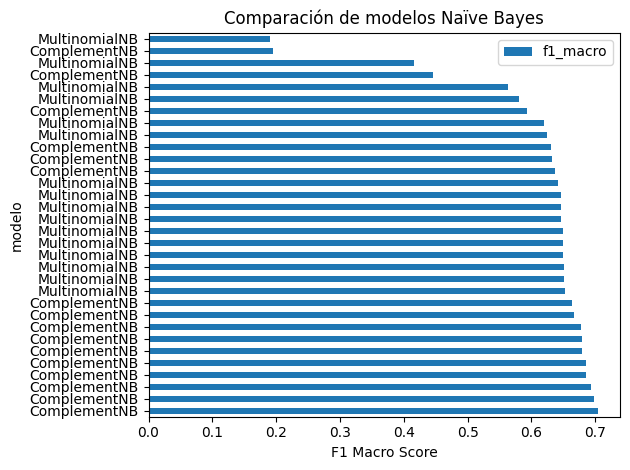

In [43]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Dataset
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Configuraciones a probar del vectorizador
vectorizer_configs = [
    {'ngram_range': (1, 1), 'stop_words': 'english', 'max_features': 10000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 10000},
    {'ngram_range': (1, 2), 'stop_words': None,       'max_features': 10000},
    {'ngram_range': (1, 1), 'stop_words': 'english', 'max_features': 5000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 5000},
    {'ngram_range': (1, 2), 'stop_words': None,       'max_features': 5000},
    {'ngram_range': (1, 1), 'stop_words': 'english', 'max_features': 15000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 15000},
    {'ngram_range': (2, 2), 'stop_words': 'english', 'max_features': 15000},
    {'ngram_range': (1, 3), 'stop_words': 'english', 'max_features': 15000},
    {'ngram_range': (3, 3), 'stop_words': 'english', 'max_features': 15000},
    {'ngram_range': (1, 1), 'stop_words': 'english', 'max_features': 20000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 20000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 50000},
    {'ngram_range': (1, 1), 'stop_words': 'english', 'max_features': 100000},
    {'ngram_range': (1, 2), 'stop_words': 'english', 'max_features': 200000},
]

# Modelos a evaluar
models = {
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB()
}

results = []

# Iterar
for config in vectorizer_configs:
    vect = TfidfVectorizer(**config)
    X_train = vect.fit_transform(train.data)
    X_test = vect.transform(test.data)

    y_train = train.target
    y_test = test.target

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred, average='macro')
        results.append({
            "modelo": model_name,
            "vectorizador": str(config),
            "f1_macro": score
        })

# Mostrar resultados ordenados, por el rendimiento según el f1-score macro
df_results = pd.DataFrame(results).sort_values(by="f1_macro", ascending=False)
import matplotlib.pyplot as plt

display(df_results)

# Gráfico comparativo
df_results.plot(kind='barh', x='modelo', y='f1_macro', title="Comparación de modelos Naïve Bayes")
plt.xlabel("F1 Macro Score")
plt.tight_layout()
plt.show()


### Desafío. Punto 3

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.

**Conclusión**

>En este caso al transponer, y analizar la similitud entre palabras, también resulta que los documentos con mayor similitud son de la misma clase o están relacionados.
- Por ejemplo con la palabra 'windows' se obtienen las clases 'misc.forsale', 'comp.graphics', 'comp.os.ms-windows.misc'.

>Sin embargo también se observa, aunque con una baja similitud, como aparecen clases poco relacionadas a la palabra analizada.
- Por ejemplo, al buscar 'football' aparece la clase 'rec.motorcycles'.

In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Markdown
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización
vect = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_features=10000)
X_train = vect.fit_transform(newsgroups_train.data)

# Transponer para obtener vectores de palabras
X_word_vectors = X_train.T

# Vocabulario: índice a palabra
words = np.array(vect.get_feature_names_out())

# Palabras seleccionadas manualmente
selected_words = ['football', 'windows', 'police', 'officer', 'politics', 'game']

for word in selected_words:
    if word not in words:
        print(f"Palabra '{word}' no está en el vocabulario.")
        continue

    word_idx = np.where(words == word)[0][0]
    word_vector = X_word_vectors[word_idx]

    similarities = cosine_similarity(word_vector, X_word_vectors).flatten()
    top_indices = similarities.argsort()[::-1][1:6]

    display(Markdown(f"\n### Palabra: **'{word}'**"))
    display(Markdown("**Palabras más similares y sus documentos principales:**"))

    for i in top_indices:
        similar_word = words[i]
        sim_score = similarities[i]

        # Documentos donde más aparece la palabra similar
        word_vec = X_word_vectors[i].toarray().flatten()
        top_docs = np.argsort(word_vec)[::-1][:3]  # Mostrar los 3 principales documentos

        doc_info = ", ".join([f"Doc {doc_id} (Clase: {newsgroups_train.target_names[newsgroups_train.target[doc_id]]})"
                              for doc_id in top_docs])

        display(Markdown(f"  - {similar_word} (**similitud: {sim_score:.3f}**)  |  {doc_info}"))



### Palabra: **'football'**

**Palabras más similares y sus documentos principales:**

  - basketball (**similitud: 0.281**)  |  Doc 9954 (Clase: rec.sport.hockey), Doc 7988 (Clase: talk.politics.guns), Doc 4541 (Clase: rec.sport.hockey)

  - adventure (**similitud: 0.249**)  |  Doc 4922 (Clase: misc.forsale), Doc 7657 (Clase: misc.forsale), Doc 8145 (Clase: misc.forsale)

  - yards (**similitud: 0.227**)  |  Doc 3608 (Clase: rec.sport.baseball), Doc 376 (Clase: rec.motorcycles), Doc 3200 (Clase: talk.politics.mideast)

  - idaho (**similitud: 0.200**)  |  Doc 9954 (Clase: rec.sport.hockey), Doc 1351 (Clase: misc.forsale), Doc 1900 (Clase: talk.politics.guns)

  - baseball (**similitud: 0.172**)  |  Doc 736 (Clase: rec.sport.hockey), Doc 5325 (Clase: rec.sport.baseball), Doc 10708 (Clase: rec.sport.baseball)


### Palabra: **'windows'**

**Palabras más similares y sus documentos principales:**

  - dos (**similitud: 0.311**)  |  Doc 5015 (Clase: misc.forsale), Doc 1584 (Clase: misc.forsale), Doc 6759 (Clase: misc.forsale)

  - ms (**similitud: 0.227**)  |  Doc 10078 (Clase: rec.motorcycles), Doc 10511 (Clase: comp.graphics), Doc 6255 (Clase: comp.graphics)

  - microsoft (**similitud: 0.207**)  |  Doc 500 (Clase: comp.os.ms-windows.misc), Doc 3174 (Clase: comp.os.ms-windows.misc), Doc 9867 (Clase: talk.politics.guns)

  - file (**similitud: 0.193**)  |  Doc 3514 (Clase: talk.politics.guns), Doc 9581 (Clase: comp.os.ms-windows.misc), Doc 9690 (Clase: comp.graphics)

  - nt (**similitud: 0.192**)  |  Doc 2277 (Clase: comp.os.ms-windows.misc), Doc 1547 (Clase: comp.os.ms-windows.misc), Doc 820 (Clase: comp.os.ms-windows.misc)


### Palabra: **'police'**

**Palabras más similares y sus documentos principales:**

  - officer (**similitud: 0.321**)  |  Doc 4766 (Clase: talk.politics.guns), Doc 3267 (Clase: talk.politics.guns), Doc 9006 (Clase: sci.electronics)

  - cops (**similitud: 0.247**)  |  Doc 9824 (Clase: sci.crypt), Doc 10841 (Clase: talk.politics.guns), Doc 5771 (Clase: talk.politics.guns)

  - officers (**similitud: 0.218**)  |  Doc 5513 (Clase: talk.politics.guns), Doc 4766 (Clase: talk.politics.guns), Doc 6871 (Clase: rec.autos)

  - defamation (**similitud: 0.156**)  |  Doc 6715 (Clase: talk.politics.misc), Doc 5258 (Clase: talk.politics.mideast), Doc 7240 (Clase: talk.politics.mideast)

  - bullock (**similitud: 0.146**)  |  Doc 5258 (Clase: talk.politics.mideast), Doc 6328 (Clase: talk.politics.guns), Doc 7240 (Clase: talk.politics.mideast)


### Palabra: **'officer'**

**Palabras más similares y sus documentos principales:**

  - police (**similitud: 0.321**)  |  Doc 2885 (Clase: talk.politics.guns), Doc 9842 (Clase: sci.crypt), Doc 3433 (Clase: sci.crypt)

  - 148 (**similitud: 0.269**)  |  Doc 9431 (Clase: comp.os.ms-windows.misc), Doc 4766 (Clase: talk.politics.guns), Doc 2381 (Clase: talk.politics.mideast)

  - memoirs (**similitud: 0.268**)  |  Doc 8573 (Clase: talk.politics.mideast), Doc 9855 (Clase: talk.politics.mideast), Doc 1427 (Clase: talk.politics.mideast)

  - 164 (**similitud: 0.258**)  |  Doc 4766 (Clase: talk.politics.guns), Doc 4788 (Clase: rec.autos), Doc 10716 (Clase: rec.sport.hockey)

  - islands (**similitud: 0.222**)  |  Doc 4809 (Clase: talk.politics.misc), Doc 4766 (Clase: talk.politics.guns), Doc 147 (Clase: alt.atheism)


### Palabra: **'politics'**

**Palabras más similares y sus documentos principales:**

  - renewal (**similitud: 0.259**)  |  Doc 10445 (Clase: rec.motorcycles), Doc 10433 (Clase: talk.politics.guns), Doc 4613 (Clase: rec.autos)

  - talk (**similitud: 0.252**)  |  Doc 10539 (Clase: talk.religion.misc), Doc 8976 (Clase: talk.religion.misc), Doc 2283 (Clase: sci.space)

  - practiced (**similitud: 0.176**)  |  Doc 2775 (Clase: talk.politics.misc), Doc 4048 (Clase: sci.space), Doc 878 (Clase: talk.politics.mideast)

  - guns (**similitud: 0.173**)  |  Doc 9883 (Clase: talk.politics.guns), Doc 7162 (Clase: talk.politics.guns), Doc 1322 (Clase: talk.politics.guns)

  - fascist (**similitud: 0.167**)  |  Doc 2775 (Clase: talk.politics.misc), Doc 1808 (Clase: talk.politics.mideast), Doc 5589 (Clase: talk.politics.misc)


### Palabra: **'game'**

**Palabras más similares y sus documentos principales:**

  - games (**similitud: 0.209**)  |  Doc 1827 (Clase: rec.sport.baseball), Doc 7650 (Clase: rec.sport.hockey), Doc 5216 (Clase: rec.sport.hockey)

  - hockey (**similitud: 0.196**)  |  Doc 7995 (Clase: rec.sport.hockey), Doc 9252 (Clase: rec.sport.hockey), Doc 4113 (Clase: rec.sport.hockey)

  - espn (**similitud: 0.185**)  |  Doc 2250 (Clase: rec.sport.hockey), Doc 10459 (Clase: rec.sport.hockey), Doc 5506 (Clase: rec.sport.baseball)

  - scored (**similitud: 0.179**)  |  Doc 1243 (Clase: rec.sport.hockey), Doc 7385 (Clase: rec.sport.baseball), Doc 406 (Clase: rec.sport.hockey)

  - team (**similitud: 0.178**)  |  Doc 7952 (Clase: rec.sport.baseball), Doc 6907 (Clase: rec.sport.hockey), Doc 9901 (Clase: rec.sport.baseball)